# Understanding the Descriptive Statistics using Titanic data

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

Lets go through the process to understand the basic descriptive statistics using this dataset

### Import libraries

In [2]:
import numpy as np
import pandas as pd

# import visualization
import matplotlib.pyplot as plt
import seaborn as sns


## Read the data and understand the data types

In [3]:
df = pd.read_csv('../data/train.csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 1. Understanding the basic data types

There are 4 main types of the data:

* Nominal: the values fall into predetermined categories and can not be sorted. The following columns are nominal for Titanic dataset: Sex, Embarked, Survived.

* Ordinal: the values can be sorted, but there is no scale. Pclass variable is the example of ordinal column.

* Interval: the values can be sorted and there is a scale, but there is no zero point for the values (column with a temperature measurements in a dataset could be an example of interval data type).

* Ratio: the values can be sorted, there is a scale and a zero point for the values. The following columns are ratio: Age, SibSp, Parch, Fare.

KeyError: 'age'

## 2. Central Tendency of Features

For interval and ratio data types we can describe th central tandency of the values. Central tendency can be described using the following concepts:

**Mean**: calculated average of the values.

**Median**: the middle value.

**Mode**: the most occuring value. There can be several modes for the variable.

### Find the mean, median and mode for the variable age

In [12]:
mean1 = df['Age'].mean()
mean1



0    24.0
dtype: float64

In [16]:
median1 = df['Age'].median()
median1



28.0

In [15]:
mode1 = df['Age'].mode()
mode1



0    24.0
dtype: float64

## 3.Dispersion of Data

The following terms are used to describe the dispersion of the data:

* Range: minumum and maximum values.
* Variance: the sum of square distances from each point of the data to the mean.
* Standard deviation: the square root of the variance. Standard deviation is widely used because unlike the variance it is expressed in the same units as the values, while the variance is expressed in square units.
* Quartiles and Interquartile Range: The data points can be divided into quartiles. The 1st quartile (Q1) splits off the lowest 25% of data from the highest 75%, the 2nd quartile (Q2) cuts data set in half and the 3rd quartile (Q3) splits off the highest 25% of data from the lowest 75%

### So let's calculate range, variance, standard deviation and find out and visualize the quartiles for the variable age

### Find  the min and max age in the data

In [21]:
min = df['Age'].min()
print (min)

max = df['Age'].max()
print (max)

0.42
80.0


### Find out the variance of the feature 'Age'


In [25]:
vari = df['Age'].var()
print (vari)

211.0191247463081


### Find out the standard deviation of the feature 'Age'

In [27]:
stdVar = df['Age'].std()
print(stdVar)

14.526497332334044


## Use the describe method of Pandas dataframe. What are your observation for all the variables?

**We can get all the above discussed information and the quartiles using the describe method**

**Lets understand the quartiles here**

In [28]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Visualization of data

Calculation of values which describe central tendency and dispertion of the data is very useful for understanding of the data, but these numbers are not very demonstrative. 
The best way to understand those values is to visualize the data.

### Bar charts are commonly used to visualize nominal data so plot a bar chart for the feature 'Sex'

In [31]:
sexCount = df['Sex'].value_counts()
sexCount

male      577
female    314
Name: Sex, dtype: int64

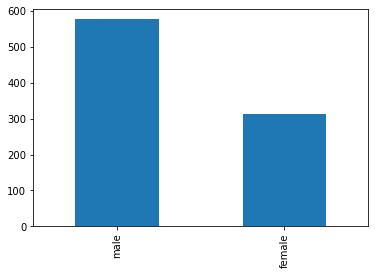

In [33]:
sexCount.plot(kind = 'bar')
plt.show()

### Histograms are used to visualize interval and ratio data. Looking at histograms we can find out the range of the data, how the data points are distributed along the range. Plot histogram for 'Age' column:

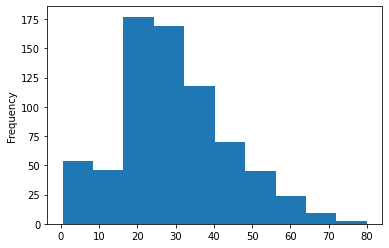

In [35]:
df['Age'].plot(kind = 'hist')
plt.show()

### Box plots are used to visualize the main statistical features of the data: mean value, mode and interquartile range (IQR). Create a box plot for the 'Age' column.

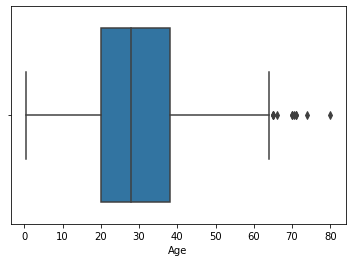

In [38]:
sns.boxplot(x= 'Age', data = df)
plt.show()

Box and whisker plots quartiles, and the band inside the box is the second quartile (the median). The ends of whiskers represent the lowest datum still within 1.5 IQR of the lower quartile, and the highest datum still within 1.5 IQR of the upper quartile. Data points outside the whiskers are plotted as small squares. 
These points are often considered as outliers and removed from the analysis.

## Understanding Pearson correlation coefficient for numerical features

In [40]:
corr = df.corr()
corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


Pearson correlation coefficient has a value between +1 and −1, where 1 is total positive linear correlation, 0 is no linear correlation, and −1 is total negative linear correlation. 

As we see on our plot there is no strong correlation between numeric variables of the dataset.

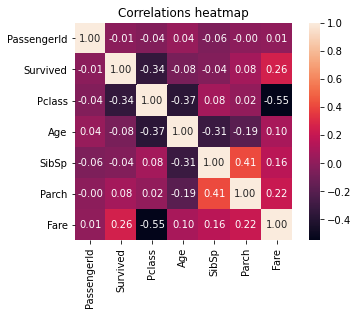

In [41]:
sns.heatmap(corr, cbar = True, annot=True, square = True, fmt = '.2f').set_title('Correlations heatmap')

plt.show()

## Discover Statistical Significance

### Find out the average value for "Survided" column for male and female passengers.


In [46]:
df[df['Sex'] == 'male']


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [47]:
df['Sex']

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

In [50]:
df[df['Sex'] == 'male']['Survived'].mean()

0.18890814558058924

In [51]:
df[df['Sex'] == 'female']['Survived'].mean()

0.7420382165605095